<a href="https://colab.research.google.com/github/bhuvi6/F.M.M.L-LABS-PROJECTS/blob/main/FMML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

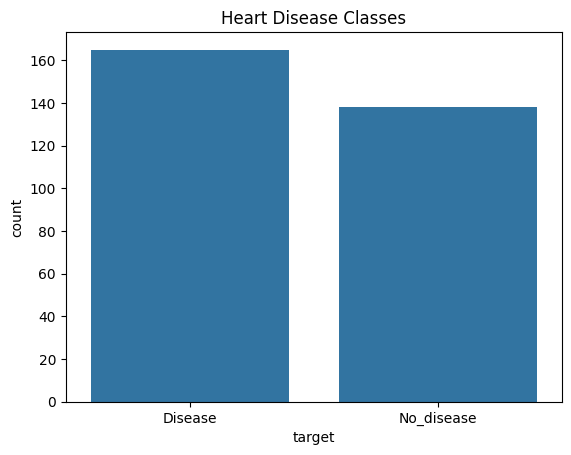

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

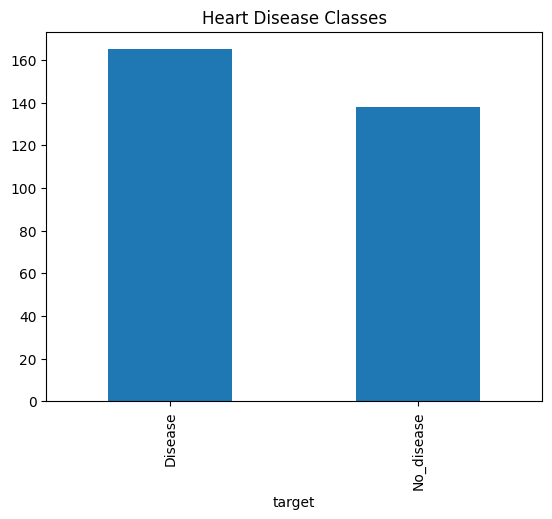

In [9]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Sex of Participants')

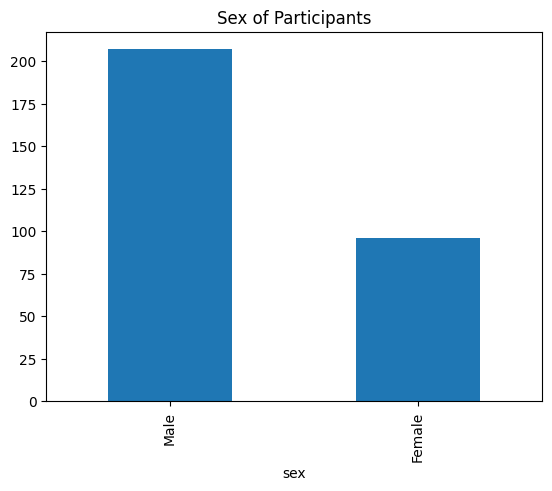

In [10]:
# prompt: ## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
# ## to do

data['sex'].value_counts().plot(kind='bar').set_title('Sex of Participants')


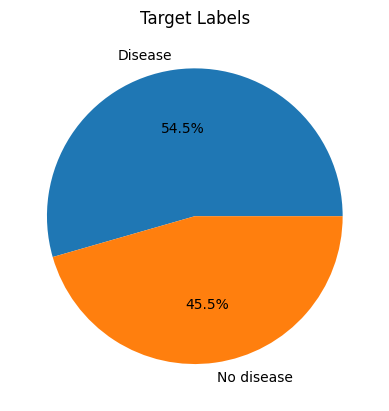

In [11]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

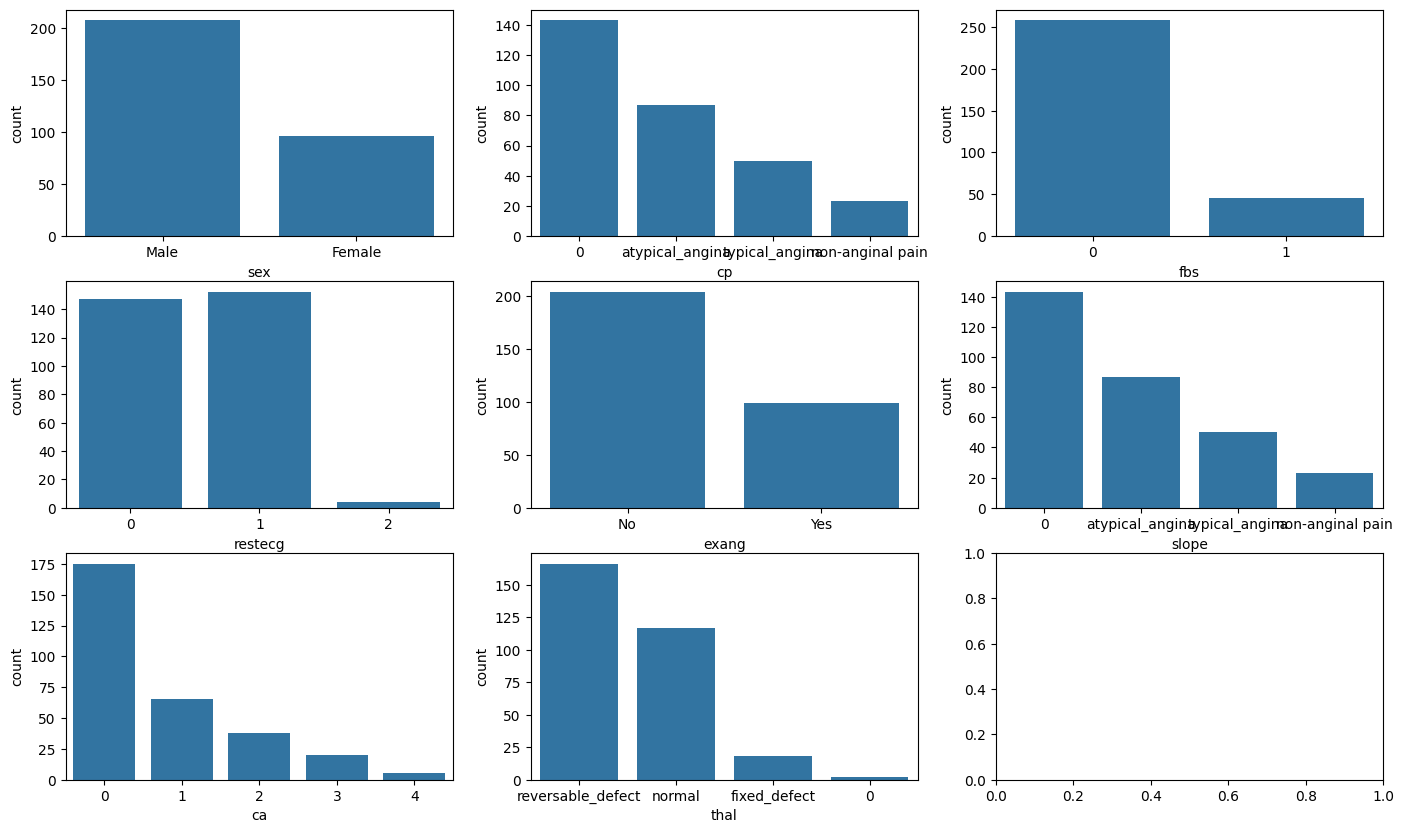

In [12]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

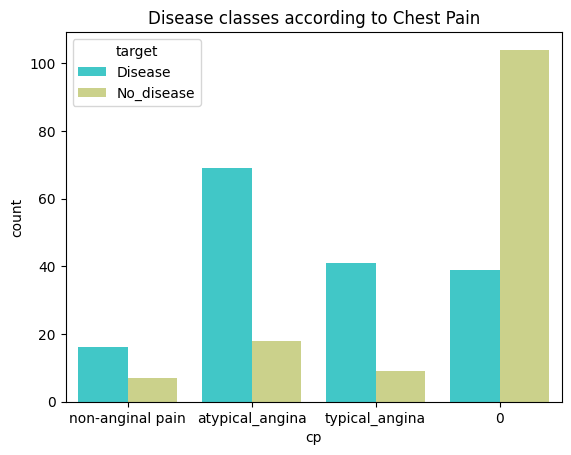

In [13]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

In [14]:
# prompt: # now lets visualise count of all vairables w.r.t the presence of disease togather:
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
# cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# for idx, feature in enumerate(cat_feat):
#     ax = axes[int(idx/3), idx%3]
#     ## to do

sns.countplot(x=feature, hue='target', data=data, palette='rainbow', ax=ax)


<Axes: xlabel='thal', ylabel='count'>

In [15]:
# Visualising the distribution of the continous variables

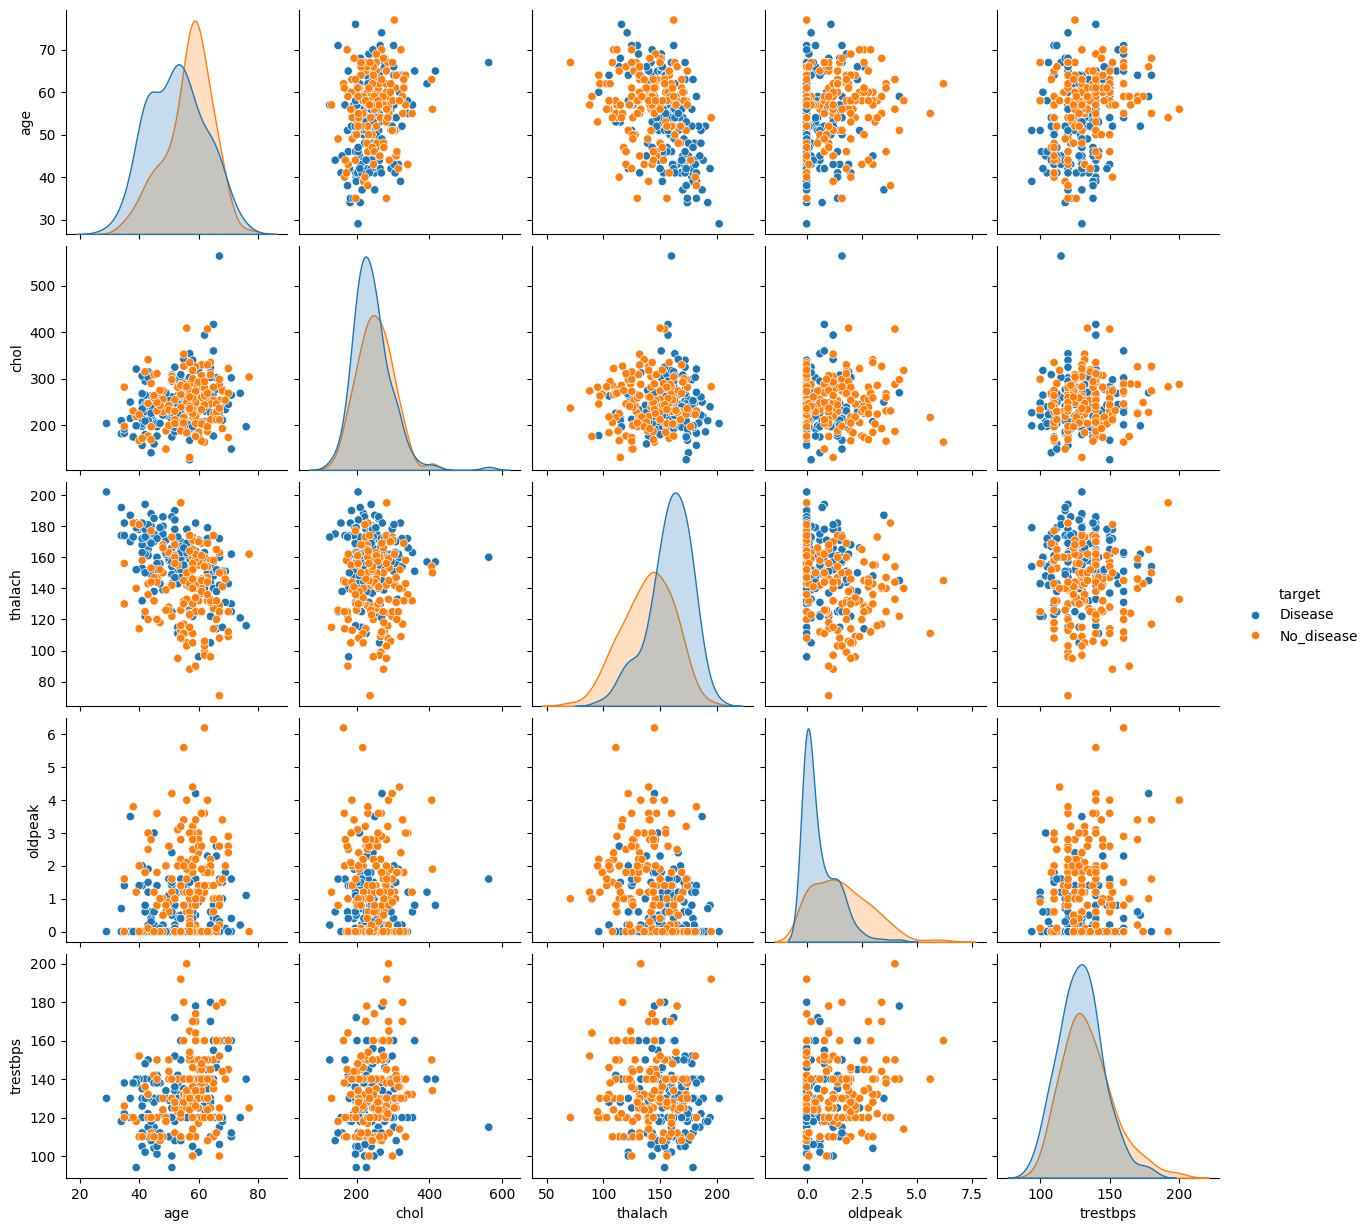

In [16]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

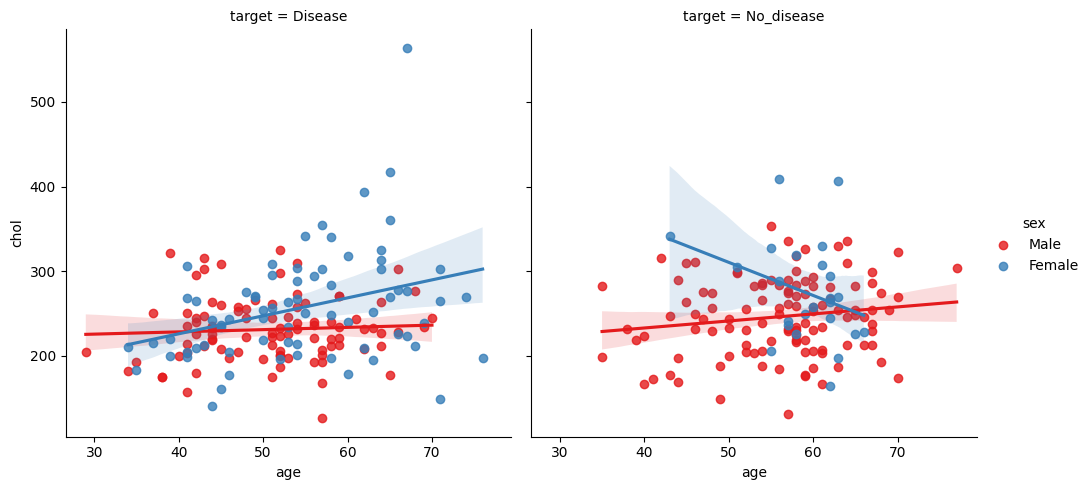

In [17]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

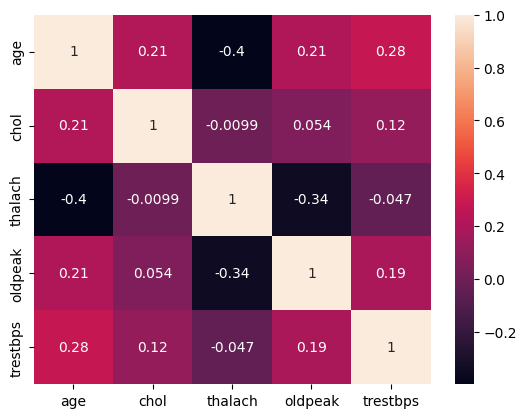

In [18]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

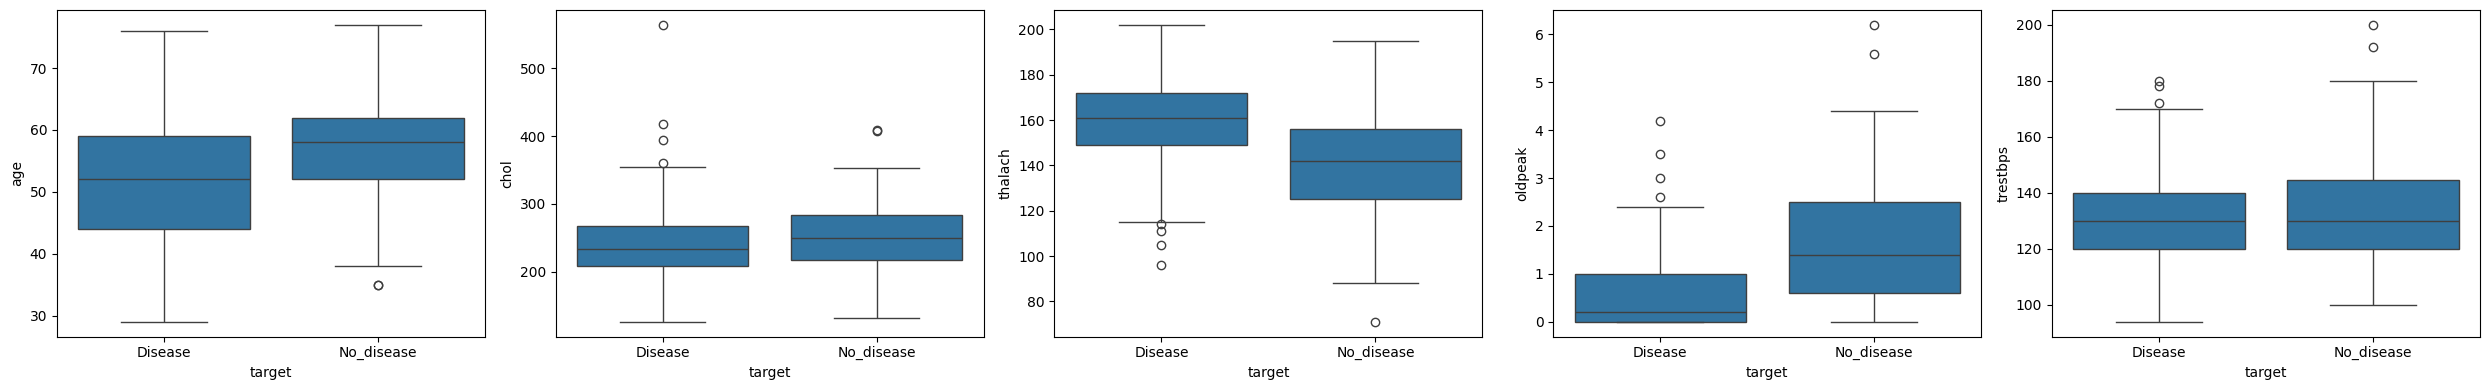

In [19]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

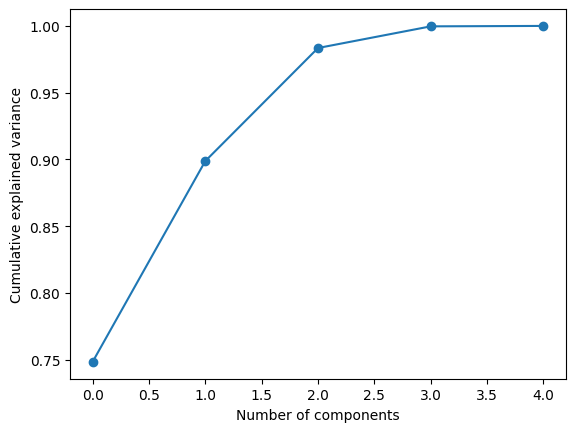

In [20]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


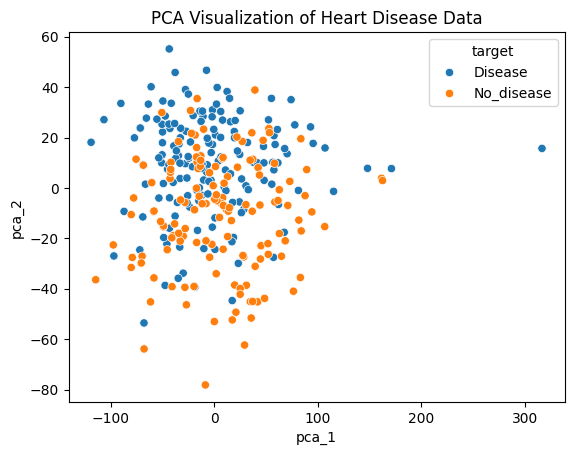

In [21]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


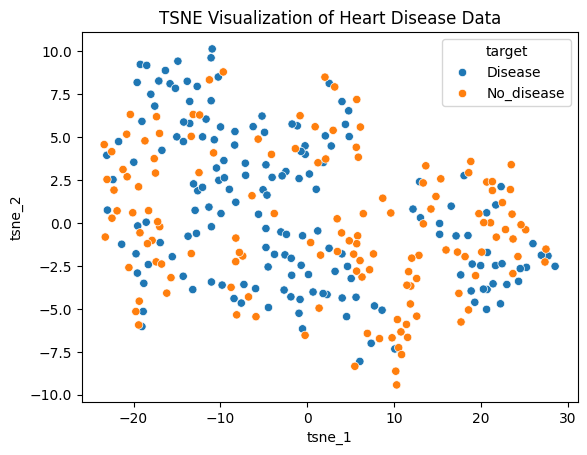

In [22]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


To address your questions effectively, I would typically need access to specific data or results from a study or analysis. However, I can guide you on how to obtain these answers if you're working with a dataset.

1. **Percentage of Samples with Disease**:
   - Calculate this by dividing the number of samples with the disease by the total number of samples, then multiplying by 100.
   - Formula: \[(\text{Number of Samples with Disease} / \text{Total Samples}) \times 100\]

2. **Continuous Features with Significant Statistical Differences**:
   - You can use statistical tests like t-tests or ANOVA to compare the distributions of continuous features between the disease and non-disease groups. Features that yield a p-value less than your significance threshold (commonly 0.05) are considered significant.

3. **Separation in PCA and t-SNE Plots**:
   - After running PCA and t-SNE, visualize the plots. Look for clusters or distinct regions that represent the presence and absence of the disease. Clear separation indicates that the features used in these analyses can effectively differentiate the groups.

4. **Optimal Number of Principal Components**:
   - You can determine this by looking at the explained variance ratio in the PCA results. The "elbow method" can be useful; plot the cumulative variance against the number of components and look for a point where adding more components yields diminishing returns.

5. **Continuous Features with Highest Correlation**:
   - Compute the correlation matrix for your continuous features using Pearson or Spearman correlation. Identify the pairs of features with the highest correlation coefficients (close to +1 or -1).

If you have specific data or results, I can help you interpret them or provide further insights!


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [23]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [24]:
data = pd.read_csv("star_nutri_expanded.csv")

In [25]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [26]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [27]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [28]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [30]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [31]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [32]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [33]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [34]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [35]:

data = data.replace({True: 1, False: 0})


<ipython-input-35-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [36]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-36-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [37]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

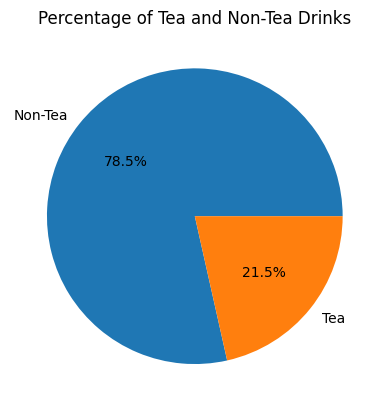

In [39]:
# prompt: ## to do
# # Create a pie chart of the 'Tea' column also write your observation form the plot

# Create a pie chart of the 'Tea' column
plt.pie(data['Tea'].value_counts(), labels=['Non-Tea', 'Tea'], autopct='%1.1f%%')
plt.title('Percentage of Tea and Non-Tea Drinks')
plt.show()

# Observation:
# Based on the pie chart, we can observe the proportion of drinks that are categorized as Tea versus those that are not.
# The chart visually represents the dominance of one category over the other, providing insights into the distribution of tea-based drinks within the dataset.


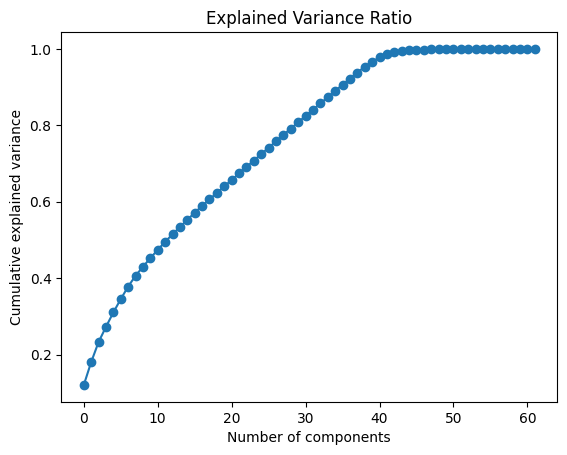

Number of components to explain 95% variance: 39


In [40]:
# prompt: ## to do
# # perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?

from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
numerical_features = data.select_dtypes(include=['number']).columns
numeric_data = data[numerical_features]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Ratio')
plt.show()


# Determine optimal number of components (elbow method)
# You can visually inspect the plot to find the "elbow" point, where adding more components provides diminishing returns.
# Alternatively, you can choose a threshold (e.g., 95% explained variance) and find the number of components needed to reach that threshold.

# Example: Find the number of components needed to explain 95% of the variance
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components_95}")


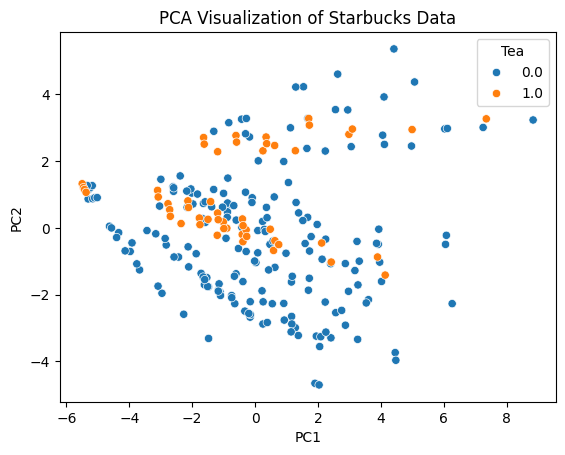

In [41]:
# prompt: ## to do
# # visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?

# Choose the number of principal components based on the explained variance plot
# You can select a number that captures a significant portion of the variance while keeping dimensionality manageable.
# For example, you might choose 10 components based on the plot.

n_components = 10  # You can adjust this based on the explained variance plot

# Perform PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components and Tea labels
pca_df = pd.DataFrame(
    data=pca_data,
    columns=[f"PC{i}" for i in range(1, n_components + 1)],
)
pca_df["Tea"] = data["Tea"]


# Visualize the principal components with a scatter plot (using the first two components)
sns.scatterplot(x="PC1", y="PC2", hue="Tea", data=pca_df)
plt.title("PCA Visualization of Starbucks Data")
plt.show()

# Observation:
# The scatter plot shows how the data points are distributed based on the first two principal components.
# You can observe if there is any separation or clustering between the tea and non-tea categories based on the principal components.
# If the two groups are well-separated, it might indicate that the principal components can effectively differentiate the two categories.
# If the two groups overlap significantly, it might suggest that the principal components don't capture enough information to separate the categories effectively.


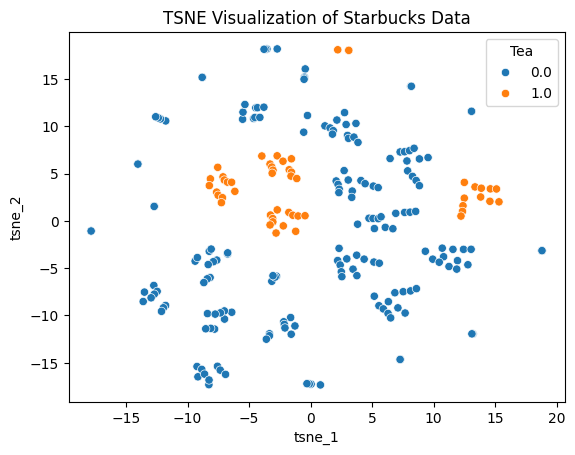

In [42]:
# prompt: ## to do
# # plot the first 2 components of tsne, whats you observation from the plot?

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(scaled_data)

# Create a DataFrame with the TSNE components and Tea labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "Tea": data["Tea"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="Tea", data=tsne_df)
plt.title("TSNE Visualization of Starbucks Data")
plt.show()

# Observation:
# (Write your observations about the TSNE plot here, based on the clusters and separation between Tea and Non-Tea categories.)
# For example, you might observe:
# - If there's clear separation between Tea and Non-Tea drinks, it suggests that TSNE effectively captures the differences between these categories.
# - If there's overlap, it might mean that there's not much difference in the features between these categories according to TSNE.
# - You can also discuss if the clusters are dense or spread out, and if there are any unusual patterns in the plot.


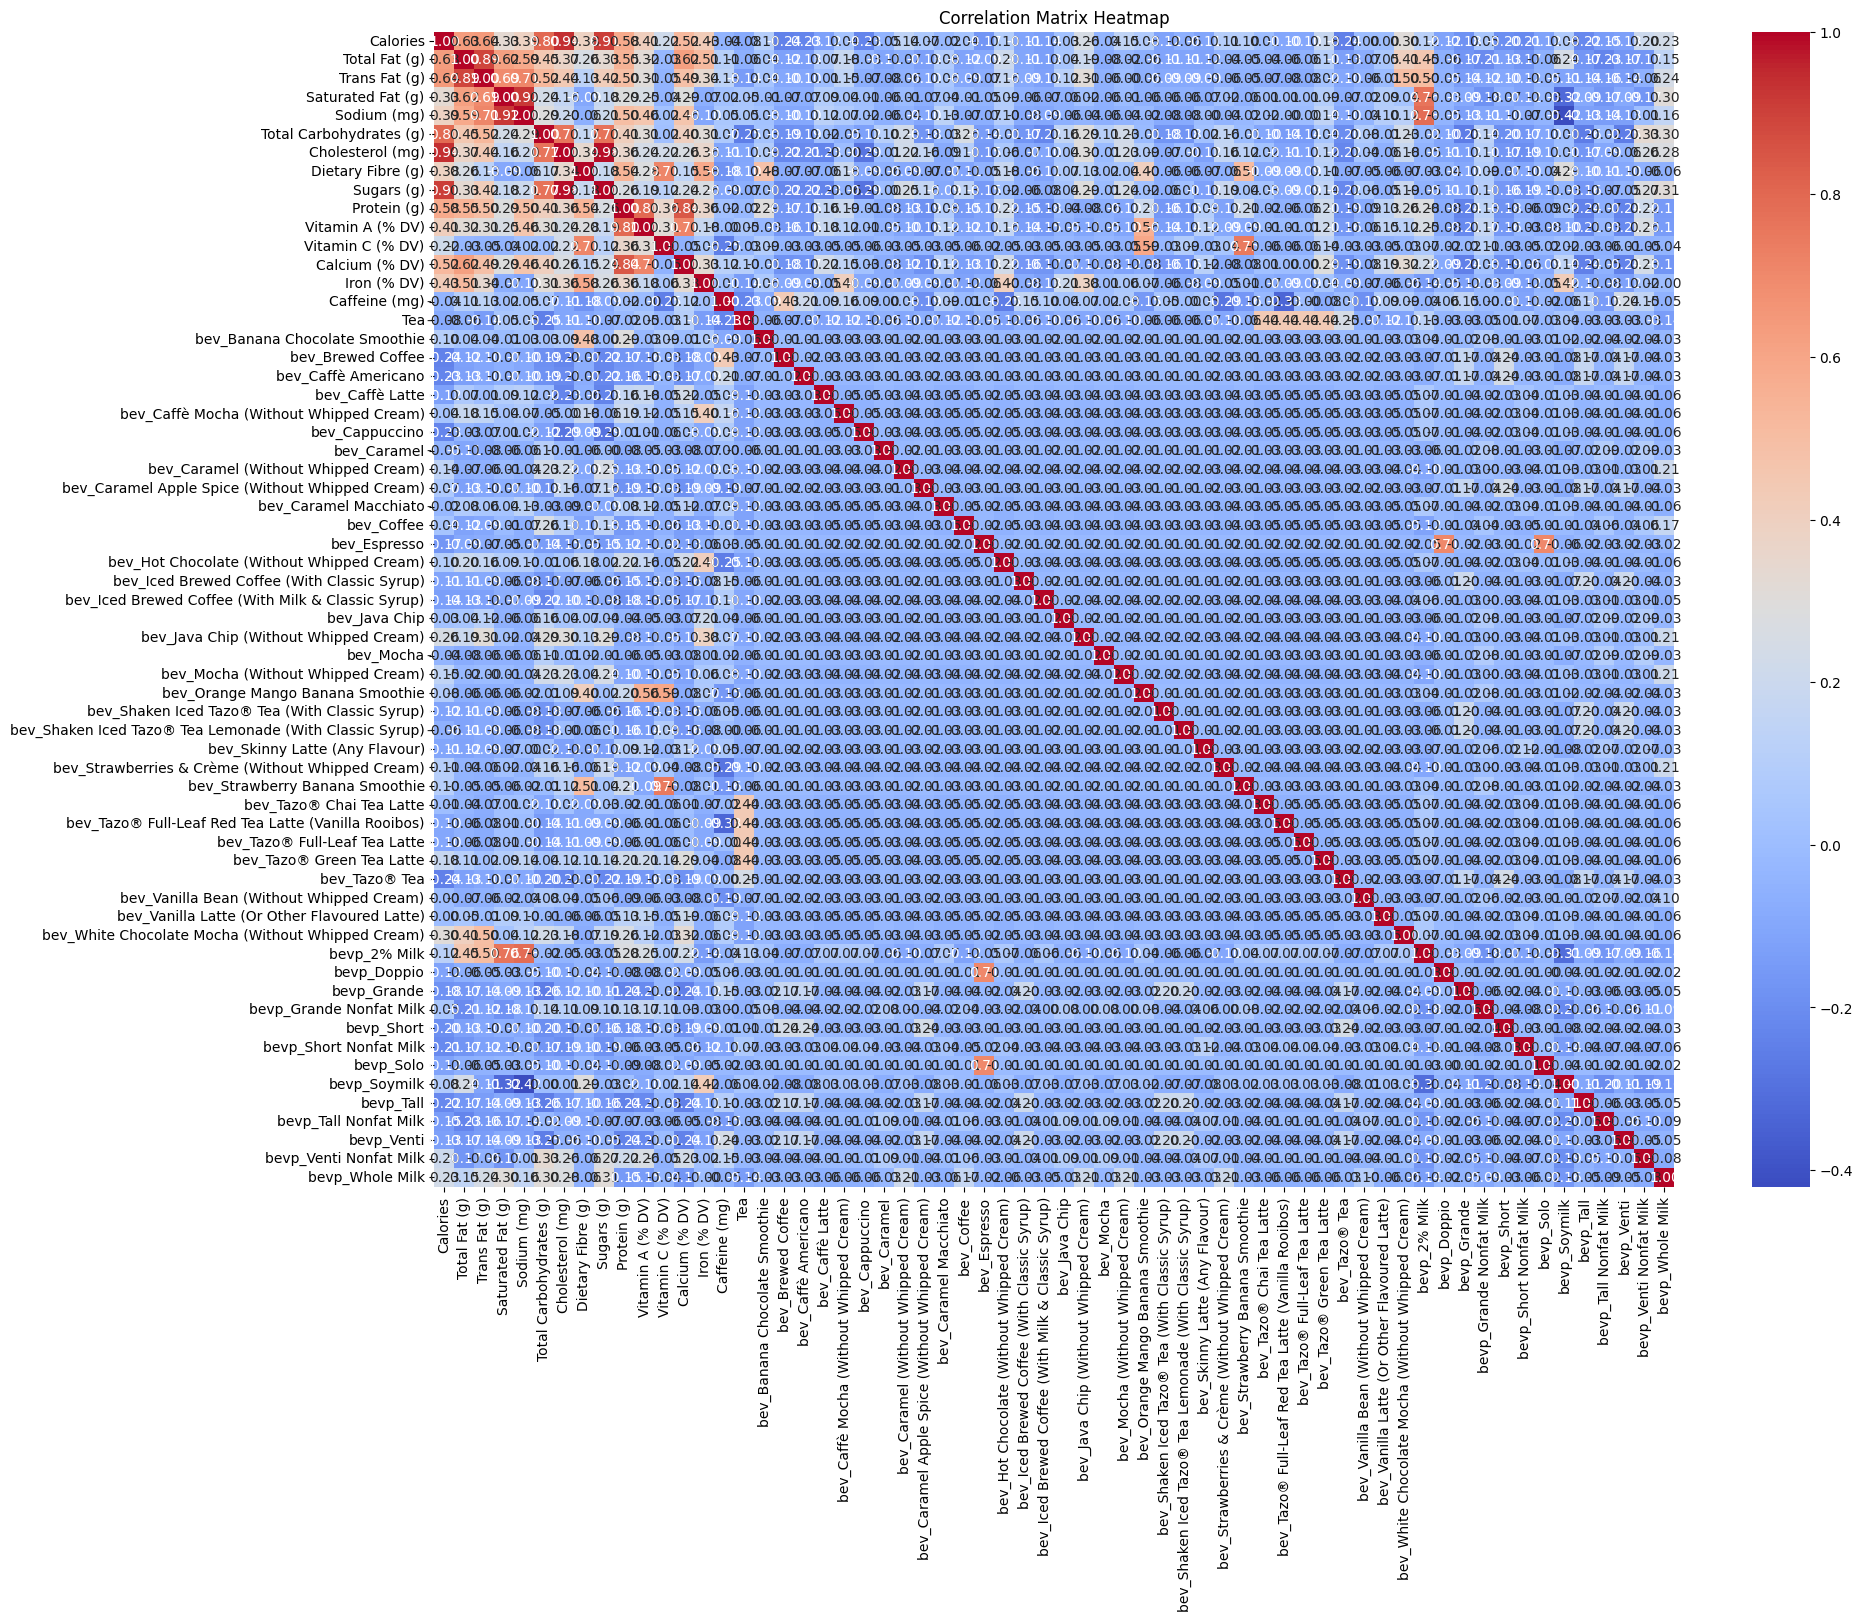

In [43]:
# prompt: ## to do
# # create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Observation:
# (Write your observations about the heatmap here)
# For example, you might observe:
# - High positive correlations between certain features, indicating that they tend to increase or decrease together.
# - High negative correlations between some features, suggesting an inverse relationship.
# - Features with correlations close to zero indicate no strong linear relationship.
# - You can look for features that are strongly correlated with "Tea" to understand which features might be most important in differentiating tea and non-tea drinks.
# - You can also comment on the presence of multicollinearity (high correlations between predictor variables) if it exists.


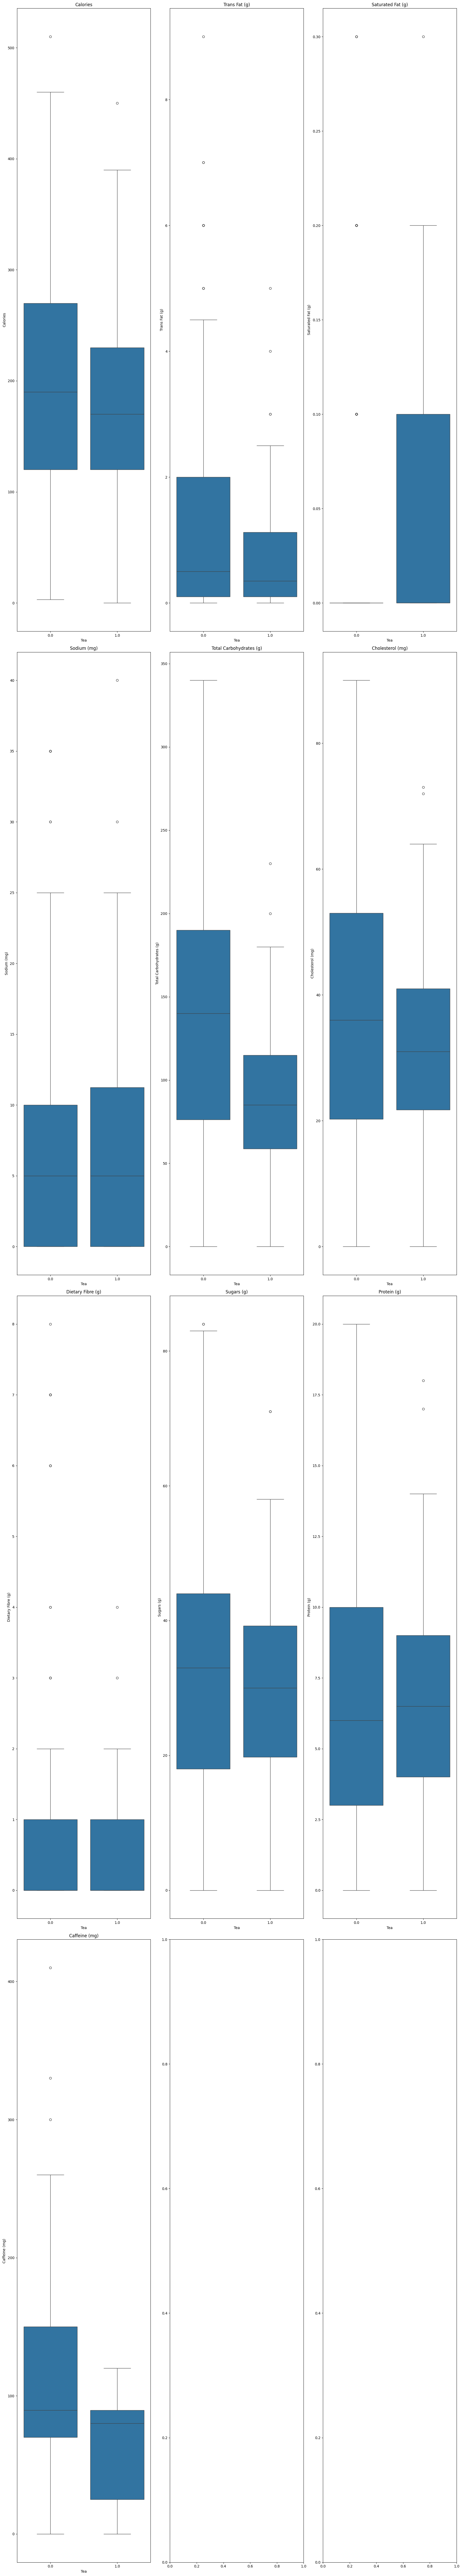

In [44]:
# prompt: ## to do
# # make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?

# Create a boxplot for each numeric column
fig, axes = plt.subplots(nrows=len(numeric_columns) // 3 + 1, ncols=3, figsize=(18, 100))
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Tea', y=column, data=data, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

# Based on the boxplots, analyze which column/columns can be the most potential indicator
# of whether it's a tea or a non-tea drink. Look for columns where the distributions
# of tea and non-tea drinks are significantly different.
#
# For example, you might find that columns like "Calories", "Total Fat (g)", "Sugars (g)",
# "Protein (g)", "Caffeine (mg)" might show distinct differences between tea and non-tea
# drinks.
#
# In your analysis, consider features where:
# 1. The medians of the tea and non-tea groups are significantly different.
# 2. There's minimal overlap between the interquartile ranges of the two groups.
# 3. The distributions themselves are noticeably different (e.g., one group is skewed while
#    the other is more symmetrical).
#
# These characteristics suggest that a feature is a good potential indicator of whether
# a drink is a tea or not.


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.